<a href="https://colab.research.google.com/github/sofiesoltani/awesome-public-datasets/blob/master/Office_TV_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

---



In [ ]:
import pandas as pd
data = pd.read_csv('the_office_series.csv', parse_dates=['Date'])
Office_df = data.rename(columns={'Unnamed: 0': 'episode_number'})
Office_df.info()
Office_df['Ratings'].describe()[['25%', '50%', '75%']]
Office_df['GuestStars_has']=Office_df['GuestStars'].notnull()

Office_df.head()

In [143]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [11, 7]

In [165]:
cols = []

for ind, row in Office_df.iterrows():
    if row['Ratings'] < 7.8:
      cols.append('red')
    elif row['Ratings'] < 8.2:
      cols.append('orange')
    elif row['Ratings'] < 8.6:
      cols.append('lightgreen')
    else:
      cols.append('darkgreen')
  
sizes = []

for ind, row in Office_df.iterrows():
  if row['GuestStars_has']==False:
    sizes.append(25)
  else:
    sizes.append(250)

Office_df['colors'] = cols
Office_df['sizes'] = sizes

Office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   episode_number  188 non-null    int64         
 1   Season          188 non-null    int64         
 2   EpisodeTitle    188 non-null    object        
 3   About           188 non-null    object        
 4   Ratings         188 non-null    float64       
 5   Votes           188 non-null    int64         
 6   Viewership      188 non-null    float64       
 7   Duration        188 non-null    int64         
 8   Date            188 non-null    datetime64[ns]
 9   GuestStars      29 non-null     object        
 10  Director        188 non-null    object        
 11  Writers         188 non-null    object        
 12  GuestStars_has  188 non-null    bool          
 13  colors          188 non-null    object        
 14  Sizes           188 non-null    int64         
 15  sizes 

In [149]:
office_df_star=Office_df[Office_df['GuestStars_has']==True]
office_df_nostar=Office_df[Office_df['GuestStars_has']==False]

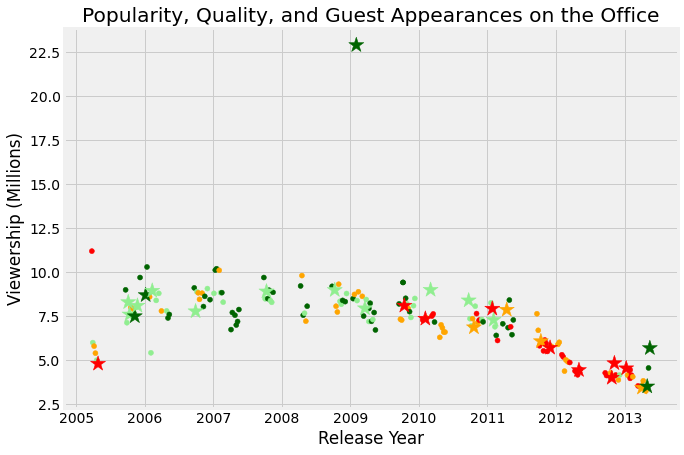

In [155]:
fig = plt.figure()
plt.style.use('fivethirtyeight')
plt.scatter(x=office_df_nostar['Date'], y=office_df_nostar['Viewership'], c=office_df_nostar['colors'], s=office_df_nostar['sizes'])
plt.scatter(x=office_df_star['Date'], y=office_df_star['Viewership'], c=office_df_star['colors'], s=office_df_star['sizes'], marker='*')
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Release Year")
plt.ylabel("Viewership (Millions)")
plt.show()

In [163]:
Office_df[Office_df['Viewership']==Office_df['Viewership'].max()]['GuestStars']

77    Cloris Leachman, Jack Black, Jessica Alba
Name: GuestStars, dtype: object